In [1]:
import keras
import os, skimage.io,matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
from scipy.misc import toimage
from keras.datasets import fashion_mnist

def printCatagory(Ydata):
    catagoryNum = [0,0,0,0,0,0,0,0,0,0]
    for data in Ydata:
        catagoryNum+=data
    print(catagoryNum)

from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

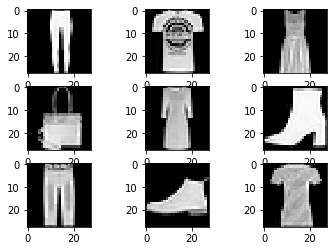

In [2]:
(images, labels), (test_images, test_labels) = fashion_mnist.load_data()
for i in range(0, 9):
  plt.subplot(330 + 1 + i)
  plt.imshow(images[330+i], cmap=plt.get_cmap('gray'))
  # show the plo
plt.show()
#conferming dataset

In [3]:
num_pixels = images.shape[1] * images.shape[2]

images = images/255
test_images = test_images/255

images_flat = images.reshape(images.shape[0], num_pixels).astype('float32')
test_images_flat = test_images.reshape(test_images.shape[0], num_pixels).astype('float32')

labels = np_utils.to_categorical(labels)
test_labels = np_utils.to_categorical(test_labels)
num_classes = labels.shape[1]

In [4]:
train_images_flat,validation_images_flat,train_labels,validation_labels = train_test_split(images_flat, labels, train_size=0.8, test_size=0.2,random_state=0)
print("train labels count")
printCatagory(train_labels)
print("validate label count")
printCatagory(validation_labels)
#reasonablelly even split

train labels count
[4816. 4813. 4794. 4775. 4783. 4780. 4814. 4844. 4792. 4789.]
validate label count
[1184. 1187. 1206. 1225. 1217. 1220. 1186. 1156. 1208. 1211.]


# 1 the number of hidden nodes

In [5]:
modelArr = []
trainingHistory = []
scores = []
for i in range(0,10):
    model = Sequential()
    model.add(Dense(50+(50*i), input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    modelArr.append(model)
    tHistory = model.fit(train_images_flat, train_labels, validation_data=(validation_images_flat,validation_labels), epochs=10, shuffle=True,batch_size=64, verbose=0)
    trainingHistory.append(tHistory)
    scor = model.evaluate(test_images_flat, test_labels)
    print(scor)
    scores.append(scor)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
10000/10000 [==============================] - 0s 25us/step
[0.38606349041461946, 0.865]
10000/10000 [==============================] - 0s 24us/step
[0.34934278559088705, 0.8778]
10000/10000 [==============================] - 0s 25us/step
[0.3451147639632225, 0.8795]
10000/10000 [==============================] - 0s 26us/step
[0.3356398493528366, 0.8794]
10000/10000 [==============================] - 0s 27us/step
[0.35325386128425595, 0.8772]
10000/10000 [==============================] - 0s 27us/step
[0.3399750606060028, 0.8794]
10000/10000 [==============================] - 0s 26us/step
[0.3485639810562134, 0.8833]
10000/10000 [==============================] - 0s 27us/step
[0.34706489238739013, 0.88]
10000/10000 [==============================] - 0s 27us/step
[0.335349712395668, 0.8853]
10000/10000 [==============================] - 0s 27us/step
[0.34335212761163714, 0.8817]


In [6]:
for i in range(0,10):
    modelArr[i].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
La

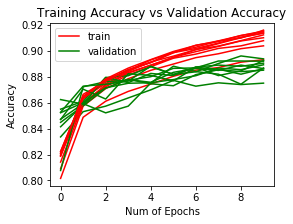

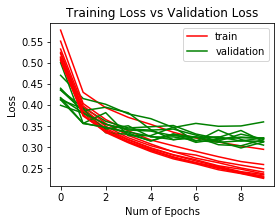

In [30]:
plt.figure(figsize=(4, 3))
for i in range(0,10):
    training_accuracy = trainingHistory[i].history['acc']
    validation_accuracy = trainingHistory[i].history['val_acc']
    plt.plot(training_accuracy,'r')
    plt.plot(validation_accuracy,'g')
    plt.xticks(np.arange(0, len(training_accuracy), 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train','validation'])
plt.show()
plt.figure(figsize=(4, 3))
for i in range(0,10):
    training_error = trainingHistory[i].history['loss']
    validation_error = trainingHistory[i].history['val_loss']
    
    plt.plot(training_error,'r')
    plt.plot(validation_error,'g')
    plt.xticks(np.arange(0, len(training_accuracy), 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train','validation'])
plt.show()
#once pass 100, increasing number of nodes only encrease the rate of overfitting

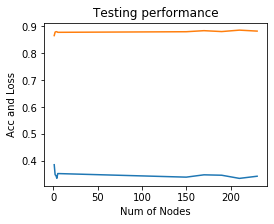

In [35]:
lMaxIter = [1,2,3,4,5,150,170,190,210,230]
plt.figure(figsize=(4, 3))
plt.xlabel("Num of Nodes")
plt.ylabel("Acc and Loss")
plt.title("Testing performance")
plt.plot(lMaxIter, scores)
plt.show()

#for test set, just like the validate set, once pass 100, increasing hidden nodes does not help at all 

# 2 number of hidden layers

In [18]:
modelArrLayers = []
trainingHistoryLayers = []
scoresLayers = []
for i in range(0,5):
    model = Sequential()
    for j in range(1,i+1):
        model.add(Dense(100, input_dim=num_pixels, activation='relu'))
    model.add(Dense(100, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    modelArrLayers.append(model)
    tHistory = model.fit(train_images_flat, train_labels, validation_data=(validation_images_flat,validation_labels), epochs=10, shuffle=True,batch_size=64, verbose=0)
    trainingHistoryLayers.append(tHistory)
    scor = model.evaluate(test_images_flat, test_labels)
    print(scor)
    scoresLayers.append(scor)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_63 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 0s 28us/step
[0.35500398210287093, 0.8745]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_65 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_66 (Dense)             (None, 10)         

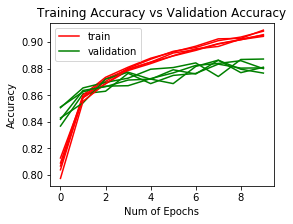

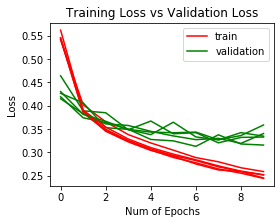

In [28]:
plt.figure(figsize=(4, 3))
for i in range(0,5):
    training_accuracy = trainingHistoryLayers[i].history['acc']
    validation_accuracy = trainingHistoryLayers[i].history['val_acc']

    plt.plot(training_accuracy,'r')
    plt.plot(validation_accuracy,'g')
    plt.xticks(np.arange(0, len(training_accuracy), 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train','validation'])
plt.show()
plt.figure(figsize=(4, 3))

for i in range(0,5):
    training_error = trainingHistoryLayers[i].history['loss']
    validation_error = trainingHistoryLayers[i].history['val_loss']
    
    plt.plot(training_error,'r')
    plt.plot(validation_error,'g')
    plt.xticks(np.arange(0, len(training_accuracy), 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train','validation'])
plt.show()
#encreasing layers doesnt really help

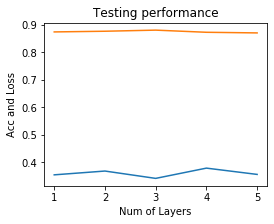

In [36]:
lMaxIter = [1,2,3,4,5]
plt.figure(figsize=(4, 3))
plt.xlabel("Num of Layers")
plt.ylabel("Acc and Loss")
plt.title("Testing performance")
plt.plot(lMaxIter, scoresLayers)
plt.show()
#encreasing layers doesnt really help

# 3 Dropout rate

In [5]:
from keras.layers.core import Dropout

In [39]:
modelArrDropout = []
trainingHistoryDropout = []
scoresDropout = []
for i in range(0,7):
    model = Sequential()
    model.add(Dense(100, input_dim=num_pixels, activation='relu'))
    model.add(Dropout(i/10))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    modelArrDropout.append(model)
    tHistory = model.fit(train_images_flat, train_labels, validation_data=(validation_images_flat,validation_labels), epochs=10, shuffle=True,batch_size=64, verbose=0)
    trainingHistoryDropout.append(tHistory)
    scor = model.evaluate(test_images_flat, test_labels)
    print(scor)
    scoresDropout.append(scor)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 0s 30us/step
[0.34690485858917236, 0.8794]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)        

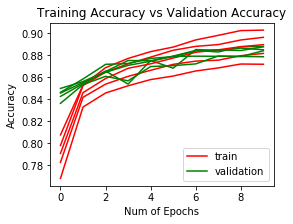

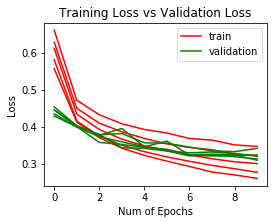

In [41]:
plt.figure(figsize=(4, 3))
for i in range(0,5):
    training_accuracy = trainingHistoryDropout[i].history['acc']
    validation_accuracy = trainingHistoryDropout[i].history['val_acc']

    plt.plot(training_accuracy,'r')
    plt.plot(validation_accuracy,'g')
    plt.xticks(np.arange(0, len(training_accuracy), 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train','validation'])
plt.show()
plt.figure(figsize=(4, 3))

for i in range(0,5):
    training_error = trainingHistoryDropout[i].history['loss']
    validation_error = trainingHistoryDropout[i].history['val_loss']
    
    plt.plot(training_error,'r')
    plt.plot(validation_error,'g')
    plt.xticks(np.arange(0, len(training_accuracy), 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train','validation'])
plt.show()
#changing trand in training set, but not in test set

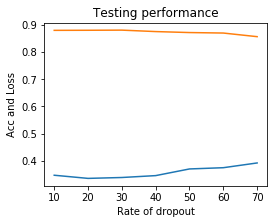

In [42]:
lMaxIter = [10,20,30,40,50,60,70]
plt.figure(figsize=(4, 3))
plt.xlabel("Rate of dropout")
plt.ylabel("Acc and Loss")
plt.title("Testing performance")
plt.plot(lMaxIter, scoresDropout)
plt.show()
#higher dropout leads to lower performance, seems not overfitting 

# 4 batch size

In [43]:
modelArrBatchSize = []
trainingHistoryBatchSize = []
scoresBatchSize = []
for i in range(0,20):
    model = Sequential()
    model.add(Dense(100, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.summary()
    modelArrBatchSize.append(model)
    tHistory = model.fit(train_images_flat, train_labels, validation_data=(validation_images_flat,validation_labels), epochs=10, shuffle=True,batch_size=10+i*30, verbose=0)
    trainingHistoryBatchSize.append(tHistory)
    scor = model.evaluate(test_images_flat, test_labels)
    print(scor)
    scoresBatchSize.append(scor)
#larger batch leads to faster training

10000/10000 [==============================] - 0s 31us/step
[0.3678773384094238, 0.873]
10000/10000 [==============================] - 0s 31us/step
[0.3436005691409111, 0.8779]
10000/10000 [==============================] - 0s 32us/step
[0.3871678394079208, 0.8635]
10000/10000 [==============================] - 0s 32us/step
[0.35188079047203064, 0.8735]
10000/10000 [==============================] - 0s 35us/step
[0.36963495695590975, 0.8704]
10000/10000 [==============================] - 0s 32us/step
[0.3529272257804871, 0.8746]
10000/10000 [==============================] - 0s 33us/step
[0.35197120844125745, 0.8758]
10000/10000 [==============================] - 0s 34us/step
[0.3707020304918289, 0.8667]
10000/10000 [==============================] - 0s 34us/step
[0.3661291644334793, 0.8696]
10000/10000 [==============================] - 0s 34us/step
[0.3652240476131439, 0.8703]
10000/10000 [==============================] - 0s 34us/step
[0.37269807596206667, 0.8674]
10000/10000 [=====

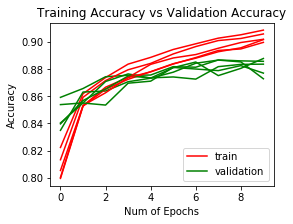

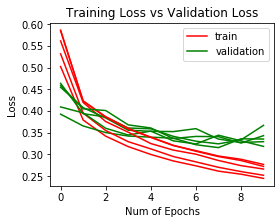

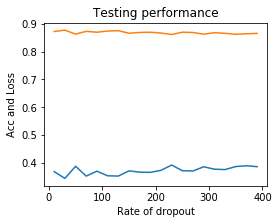

In [44]:
plt.figure(figsize=(4, 3))
for i in range(0,5):
    training_accuracy = trainingHistoryBatchSize[i].history['acc']
    validation_accuracy = trainingHistoryBatchSize[i].history['val_acc']

    plt.plot(training_accuracy,'r')
    plt.plot(validation_accuracy,'g')
    plt.xticks(np.arange(0, len(training_accuracy), 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train','validation'])
plt.show()
plt.figure(figsize=(4, 3))

for i in range(0,5):
    training_error = trainingHistoryBatchSize[i].history['loss']
    validation_error = trainingHistoryBatchSize[i].history['val_loss']
    
    plt.plot(training_error,'r')
    plt.plot(validation_error,'g')
    plt.xticks(np.arange(0, len(training_accuracy), 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train','validation'])
plt.show()
lMaxIter = []
for i in range(0,20):
    lMaxIter.append(10+20*i)
plt.figure(figsize=(4, 3))
plt.xlabel("Rate of dropout")
plt.ylabel("Acc and Loss")
plt.title("Testing performance")
plt.plot(lMaxIter, scoresBatchSize)
plt.show()
#smaller batch size have major nagative impact on speed, but only minor positive impact on test accuracy

# 5 optimizer type

In [55]:
optimizers = ["SGD", "Adam", "Adadelta", "Adagrad", "Adamax", "Nadam", "RMSprop"]

In [58]:
modelArrBatchSize = []
trainingHistoryBatchSize = []
scoresBatchSize = []
for i in range(0,7):
    model = Sequential()
    model.add(Dense(100, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizers[i], metrics=['accuracy'])
    #model.summary()
    modelArrBatchSize.append(model)
    tHistory = model.fit(train_images_flat, train_labels, validation_data=(validation_images_flat,validation_labels), epochs=10, shuffle=True,batch_size=500, verbose=0)
    trainingHistoryBatchSize.append(tHistory)
    scor = model.evaluate(test_images_flat, test_labels)
    print(scor)
    scoresBatchSize.append(scor)
#larger batch leads to faster training

10000/10000 [==============================] - 0s 39us/step
[0.6513228944301606, 0.7838]
10000/10000 [==============================] - 0s 40us/step
[0.382906210231781, 0.8674]
10000/10000 [==============================] - 0s 40us/step
[0.4662717248439789, 0.8394]
10000/10000 [==============================] - 0s 42us/step
[0.40412472493648527, 0.8579]
10000/10000 [==============================] - 0s 40us/step
[0.3986729177474976, 0.8595]
10000/10000 [==============================] - 0s 40us/step
[0.3686510001540184, 0.8674]
10000/10000 [==============================] - 0s 39us/step
[0.42191707985401156, 0.8458]


SGD


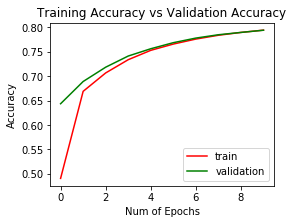

Adam


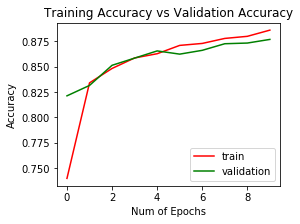

Adadelta


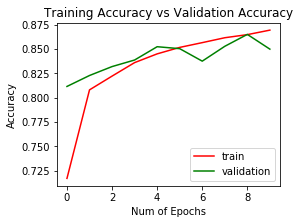

Adagrad


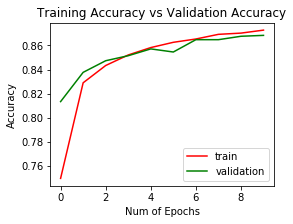

Adamax


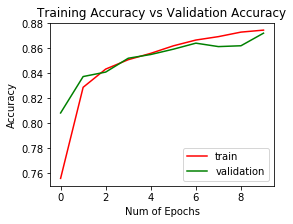

Nadam


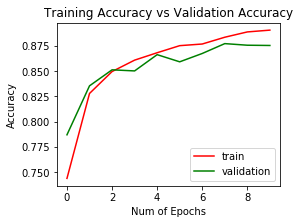

RMSprop


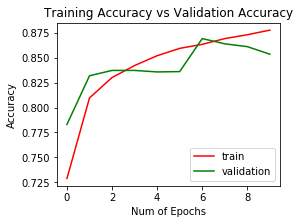

SGD


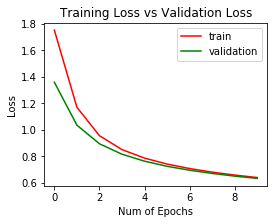

Adam


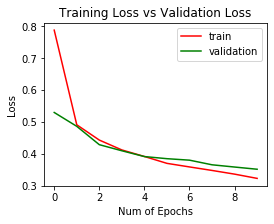

Adadelta


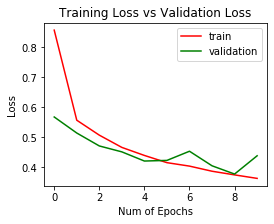

Adagrad


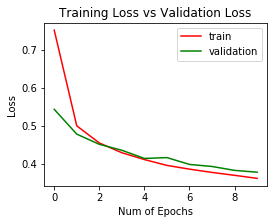

Adamax


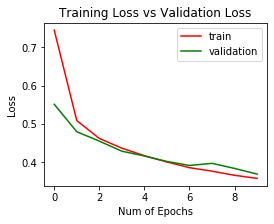

Nadam


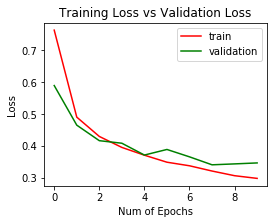

RMSprop


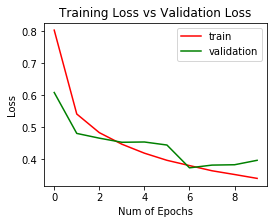

Testing performance
[[0.6513228944301606, 0.7838], [0.382906210231781, 0.8674], [0.4662717248439789, 0.8394], [0.40412472493648527, 0.8579], [0.3986729177474976, 0.8595], [0.3686510001540184, 0.8674], [0.42191707985401156, 0.8458]]


In [68]:
for i in range(0,7):
    plt.figure(figsize=(4, 3))
    print(optimizers[i])
    training_accuracy = trainingHistoryBatchSize[i].history['acc']
    validation_accuracy = trainingHistoryBatchSize[i].history['val_acc']

    plt.plot(training_accuracy,'r')
    plt.plot(validation_accuracy,'g')
    plt.xticks(np.arange(0, len(training_accuracy), 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train','validation'])
    plt.show()

for i in range(0,7):
    plt.figure(figsize=(4, 3))
    print(optimizers[i])

    training_error = trainingHistoryBatchSize[i].history['loss']
    validation_error = trainingHistoryBatchSize[i].history['val_loss']
    
    plt.plot(training_error,'r')
    plt.plot(validation_error,'g')
    plt.xticks(np.arange(0, len(training_accuracy), 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train','validation'])
    plt.show()

print("Testing performance")
print(scoresBatchSize)
#optimizer help converge faster, dont effect final performance, sgd is slower but has a better curve

# 5.5 sgd long term test

In [74]:
#sgd long term test
model = Sequential()
model.add(Dense(100, input_dim=num_pixels, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="SGD", metrics=['accuracy'])
model.summary()
finalHistory = model.fit(train_images_flat, train_labels, validation_data=(validation_images_flat,validation_labels), epochs=1000, shuffle=True,batch_size=500, verbose=1)
scor = model.evaluate(test_images_flat, test_labels)
print(scor)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_240 (Dense)            (None, 100)               78500     
_________________________________________________________________
dropout_15 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_241 (Dense)            (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/1000
48000/48000 [==============================] - 2s 51us/step - loss: 1.8799 - acc: 0.3771 - val_loss: 1.4454 - val_acc: 0.6341
Epoch 2/1000
48000/48000 [==============================] - 0s 9us/step - loss: 1.2985 - acc: 0.6113 - val_loss: 1.0934 - val_acc: 0.6828
Epoch 3/1000
48000/48000 [==============================] - 0s 8us/step - l

Epoch 113/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.4250 - acc: 0.8525 - val_loss: 0.4068 - val_acc: 0.8571
Epoch 114/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.4237 - acc: 0.8529 - val_loss: 0.4064 - val_acc: 0.8567
Epoch 115/1000
48000/48000 [==============================] - 0s 8us/step - loss: 0.4228 - acc: 0.8543 - val_loss: 0.4058 - val_acc: 0.8564
Epoch 116/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.4229 - acc: 0.8530 - val_loss: 0.4051 - val_acc: 0.8567
Epoch 117/1000
48000/48000 [==============================] - 0s 8us/step - loss: 0.4197 - acc: 0.8549 - val_loss: 0.4045 - val_acc: 0.8570
Epoch 118/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.4199 - acc: 0.8549 - val_loss: 0.4038 - val_acc: 0.8568
Epoch 119/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.4205 - acc: 0.8551 - val_loss: 0.4033 - val_acc: 0.8578
Epoch 120/1000
48000

48000/48000 [==============================] - 0s 9us/step - loss: 0.3660 - acc: 0.8721 - val_loss: 0.3635 - val_acc: 0.8715
Epoch 230/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.3681 - acc: 0.8715 - val_loss: 0.3634 - val_acc: 0.8685
Epoch 231/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.3666 - acc: 0.8729 - val_loss: 0.3634 - val_acc: 0.8704
Epoch 232/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.3662 - acc: 0.8706 - val_loss: 0.3628 - val_acc: 0.8693
Epoch 233/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.3667 - acc: 0.8724 - val_loss: 0.3627 - val_acc: 0.8692
Epoch 234/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.3634 - acc: 0.8740 - val_loss: 0.3621 - val_acc: 0.8689
Epoch 235/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.3649 - acc: 0.8727 - val_loss: 0.3622 - val_acc: 0.8686
Epoch 236/1000
48000/48000 [=======

48000/48000 [==============================] - 0s 8us/step - loss: 0.3345 - acc: 0.8830 - val_loss: 0.3429 - val_acc: 0.8757
Epoch 346/1000
48000/48000 [==============================] - 0s 8us/step - loss: 0.3350 - acc: 0.8820 - val_loss: 0.3427 - val_acc: 0.8762
Epoch 347/1000
48000/48000 [==============================] - 0s 8us/step - loss: 0.3354 - acc: 0.8828 - val_loss: 0.3430 - val_acc: 0.8748
Epoch 348/1000
48000/48000 [==============================] - 0s 8us/step - loss: 0.3353 - acc: 0.8830 - val_loss: 0.3425 - val_acc: 0.8762
Epoch 349/1000
48000/48000 [==============================] - 0s 8us/step - loss: 0.3347 - acc: 0.8826 - val_loss: 0.3423 - val_acc: 0.8764
Epoch 350/1000
48000/48000 [==============================] - 0s 8us/step - loss: 0.3334 - acc: 0.8824 - val_loss: 0.3421 - val_acc: 0.8763
Epoch 351/1000
48000/48000 [==============================] - 0s 8us/step - loss: 0.3338 - acc: 0.8831 - val_loss: 0.3421 - val_acc: 0.8763
Epoch 352/1000
48000/48000 [=======

48000/48000 [==============================] - 0s 8us/step - loss: 0.3143 - acc: 0.8903 - val_loss: 0.3300 - val_acc: 0.8810
Epoch 462/1000
48000/48000 [==============================] - 0s 8us/step - loss: 0.3129 - acc: 0.8898 - val_loss: 0.3296 - val_acc: 0.8812
Epoch 463/1000
48000/48000 [==============================] - 0s 8us/step - loss: 0.3140 - acc: 0.8894 - val_loss: 0.3299 - val_acc: 0.8810
Epoch 464/1000
48000/48000 [==============================] - 0s 8us/step - loss: 0.3129 - acc: 0.8900 - val_loss: 0.3299 - val_acc: 0.8814
Epoch 465/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.3118 - acc: 0.8897 - val_loss: 0.3296 - val_acc: 0.8803
Epoch 466/1000
48000/48000 [==============================] - 0s 8us/step - loss: 0.3125 - acc: 0.8907 - val_loss: 0.3296 - val_acc: 0.8805
Epoch 467/1000
48000/48000 [==============================] - 0s 8us/step - loss: 0.3114 - acc: 0.8896 - val_loss: 0.3297 - val_acc: 0.8806
Epoch 468/1000
48000/48000 [=======

48000/48000 [==============================] - 0s 9us/step - loss: 0.2953 - acc: 0.8968 - val_loss: 0.3209 - val_acc: 0.8864
Epoch 578/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2947 - acc: 0.8960 - val_loss: 0.3207 - val_acc: 0.8854
Epoch 579/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2951 - acc: 0.8946 - val_loss: 0.3205 - val_acc: 0.8843
Epoch 580/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2944 - acc: 0.8966 - val_loss: 0.3206 - val_acc: 0.8843
Epoch 581/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2944 - acc: 0.8965 - val_loss: 0.3203 - val_acc: 0.8852
Epoch 582/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2921 - acc: 0.8956 - val_loss: 0.3205 - val_acc: 0.8847
Epoch 583/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2951 - acc: 0.8949 - val_loss: 0.3205 - val_acc: 0.8848
Epoch 584/1000
48000/48000 [=======

48000/48000 [==============================] - 0s 9us/step - loss: 0.2795 - acc: 0.9008 - val_loss: 0.3140 - val_acc: 0.8877
Epoch 694/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2794 - acc: 0.9012 - val_loss: 0.3142 - val_acc: 0.8878
Epoch 695/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2799 - acc: 0.9005 - val_loss: 0.3140 - val_acc: 0.8883
Epoch 696/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2791 - acc: 0.9014 - val_loss: 0.3139 - val_acc: 0.8883
Epoch 697/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2792 - acc: 0.9011 - val_loss: 0.3138 - val_acc: 0.8876
Epoch 698/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2797 - acc: 0.8999 - val_loss: 0.3141 - val_acc: 0.8880
Epoch 699/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2796 - acc: 0.9015 - val_loss: 0.3142 - val_acc: 0.8872
Epoch 700/1000
48000/48000 [=======

48000/48000 [==============================] - 0s 9us/step - loss: 0.2661 - acc: 0.9048 - val_loss: 0.3090 - val_acc: 0.8896
Epoch 810/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2659 - acc: 0.9066 - val_loss: 0.3094 - val_acc: 0.8892
Epoch 811/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2680 - acc: 0.9049 - val_loss: 0.3094 - val_acc: 0.8880
Epoch 812/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2675 - acc: 0.9052 - val_loss: 0.3092 - val_acc: 0.8890
Epoch 813/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2660 - acc: 0.9057 - val_loss: 0.3090 - val_acc: 0.8890
Epoch 814/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2671 - acc: 0.9051 - val_loss: 0.3094 - val_acc: 0.8898
Epoch 815/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2682 - acc: 0.9059 - val_loss: 0.3088 - val_acc: 0.8897
Epoch 816/1000
48000/48000 [=======

48000/48000 [==============================] - 0s 9us/step - loss: 0.2564 - acc: 0.9091 - val_loss: 0.3053 - val_acc: 0.8914
Epoch 926/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2555 - acc: 0.9104 - val_loss: 0.3052 - val_acc: 0.8907
Epoch 927/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2565 - acc: 0.9089 - val_loss: 0.3050 - val_acc: 0.8915
Epoch 928/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2546 - acc: 0.9105 - val_loss: 0.3049 - val_acc: 0.8908
Epoch 929/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2545 - acc: 0.9099 - val_loss: 0.3058 - val_acc: 0.8903
Epoch 930/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2575 - acc: 0.9077 - val_loss: 0.3050 - val_acc: 0.8908
Epoch 931/1000
48000/48000 [==============================] - 0s 9us/step - loss: 0.2542 - acc: 0.9109 - val_loss: 0.3050 - val_acc: 0.8904
Epoch 932/1000
48000/48000 [=======

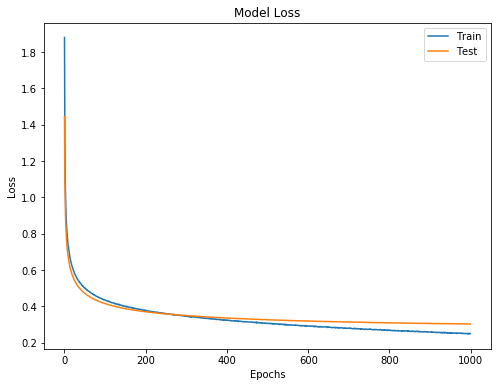

In [75]:
plt.plot(finalHistory.history['loss'])
plt.plot(finalHistory.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

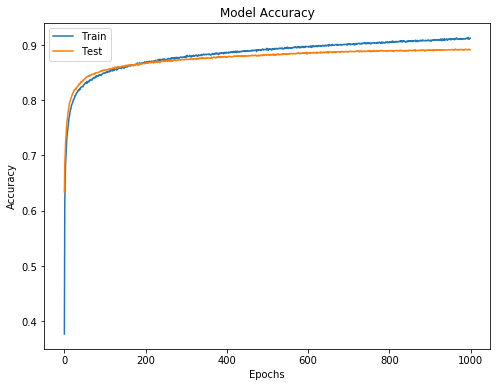

In [76]:
plt.plot(finalHistory.history['acc'])
plt.plot(finalHistory.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import pandas as pd
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

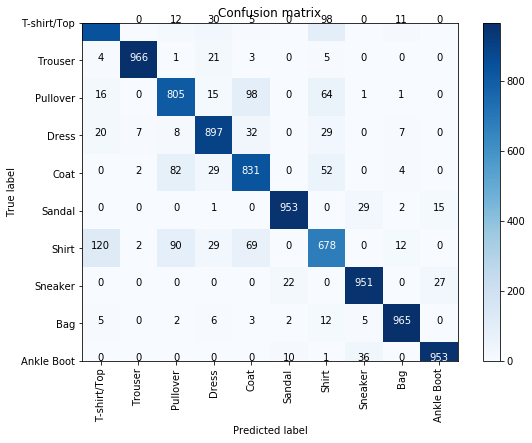

In [96]:
Y_pred = model.predict(test_images_flat)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(test_labels,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])
#coat, pullover, shirt and top are visually similar

In [8]:
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

NameError: name 'Y_true' is not defined

In [9]:
from keras.optimizers import SGD, Adam
opt = Adam(lr=3e-4, amsgrad=False)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import pandas as pd
import itertools

# final model


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 3s 63us/step - loss: 0.7916 - acc: 0.7320 - val_loss: 0.5188 - val_acc: 0.8288
Epo

Epoch 47/100
48000/48000 [==============================] - 2s 44us/step - loss: 0.2336 - acc: 0.9135 - val_loss: 0.3088 - val_acc: 0.8900
Epoch 48/100
48000/48000 [==============================] - 2s 45us/step - loss: 0.2299 - acc: 0.9152 - val_loss: 0.2999 - val_acc: 0.8926
Epoch 49/100
48000/48000 [==============================] - 2s 48us/step - loss: 0.2275 - acc: 0.9158 - val_loss: 0.3006 - val_acc: 0.8938
Epoch 50/100
48000/48000 [==============================] - 2s 44us/step - loss: 0.2255 - acc: 0.9165 - val_loss: 0.2989 - val_acc: 0.8948
Epoch 51/100
48000/48000 [==============================] - 2s 44us/step - loss: 0.2235 - acc: 0.9171 - val_loss: 0.2974 - val_acc: 0.8941
Epoch 52/100
48000/48000 [==============================] - 2s 44us/step - loss: 0.2224 - acc: 0.9169 - val_loss: 0.3093 - val_acc: 0.8918
Epoch 53/100
48000/48000 [==============================] - 2s 44us/step - loss: 0.2200 - acc: 0.9182 - val_loss: 0.2976 - val_acc: 0.8947
Epoch 54/100
48000/48000 [=

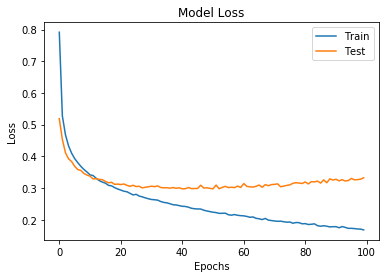

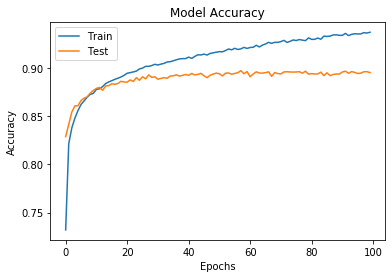

              precision    recall  f1-score   support

 T-shirt/Top       0.84      0.85      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.81      0.81      0.81      1000
       Dress       0.88      0.91      0.90      1000
        Coat       0.83      0.82      0.83      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.72      0.70      0.71      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.97      0.96      0.97      1000
  Ankle Boot       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



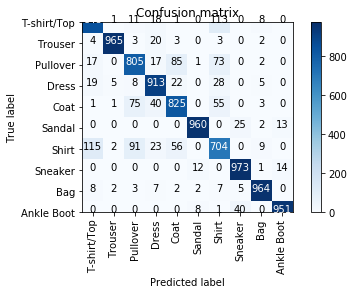

In [10]:
#final model
model = Sequential()
model.add(Dense(100, input_dim=num_pixels, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()
finalHistory = model.fit(train_images_flat, train_labels, validation_data=(validation_images_flat,validation_labels), epochs=100, shuffle=True,batch_size=64, verbose=1)
scor = model.evaluate(test_images_flat, test_labels)
print(scor)
plt.plot(finalHistory.history['loss'])
plt.plot(finalHistory.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()
plt.plot(finalHistory.history['acc'])
plt.plot(finalHistory.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()
Y_pred = model.predict(test_images_flat)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(test_labels,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])
#coat, pullover, shirt and top are visually similar
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(classification_report(Y_true, Y_pred_classes, target_names = classes))
#adam leads to faster converge and slitly better performance, but the loss will go up if over trained

# 6 learning rate

In [21]:
modelArrLr = []
trainingHistoryLr = []
scoresLr = []
learningRates = [1.1e-3,9e-4,7e-4,5e-4,3e-4,1e-4,9e-5]
for i in range(0,7):
    model = Sequential()
    model.add(Dense(100, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    opt = Adam(lr=learningRates[i], amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    #model.summary()
    modelArrLr.append(model)
    tHistory = model.fit(train_images_flat, train_labels, validation_data=(validation_images_flat,validation_labels), epochs=50, shuffle=True,batch_size=64, verbose=0)
    trainingHistoryLr.append(tHistory)
    scor = model.evaluate(test_images_flat, test_labels)
    print(scor)
    scoresLr.append(scor)
#larger batch leads to faster training

10000/10000 [==============================] - 0s 28us/step
[0.470430267137289, 0.8782]
10000/10000 [==============================] - 0s 28us/step
[0.4439739567041397, 0.8823]
10000/10000 [==============================] - 0s 29us/step
[0.4177437064111233, 0.8818]
10000/10000 [==============================] - 0s 28us/step
[0.40311309960484504, 0.8766]
10000/10000 [==============================] - 0s 28us/step
[0.34608451920747757, 0.8838]
10000/10000 [==============================] - 0s 29us/step
[0.3466832415819168, 0.8761]
10000/10000 [==============================] - 0s 29us/step
[0.35336068691015243, 0.8732]


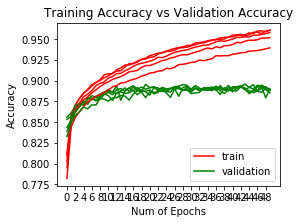

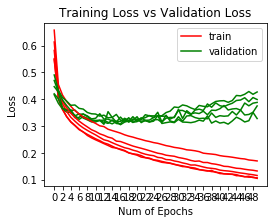

Testing performance
[0.0011, 0.0009, 0.0007, 0.0005, 0.0003, 0.0001, 9e-05]
[0.470430267137289, 0.8782]
[0.4439739567041397, 0.8823]
[0.4177437064111233, 0.8818]
[0.40311309960484504, 0.8766]
[0.34608451920747757, 0.8838]
[0.3466832415819168, 0.8761]
[0.35336068691015243, 0.8732]


In [22]:
plt.figure(figsize=(4, 3))
for i in range(0,5):
    training_accuracy = trainingHistoryLr[i].history['acc']
    validation_accuracy = trainingHistoryLr[i].history['val_acc']

    plt.plot(training_accuracy,'r')
    plt.plot(validation_accuracy,'g')
    plt.xticks(np.arange(0, len(training_accuracy), 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train','validation'])
plt.show()
plt.figure(figsize=(4, 3))

for i in range(0,5):
    training_error = trainingHistoryLr[i].history['loss']
    validation_error = trainingHistoryLr[i].history['val_loss']
    
    plt.plot(training_error,'r')
    plt.plot(validation_error,'g')
    plt.xticks(np.arange(0, len(training_accuracy), 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train','validation'])
plt.show()


print("Testing performance")
print(learningRates)
for score in scoresLr:
    print(score)
#it turns out the 3e-4 is the best lr for adam

# 7 batch normalization

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,910
Trainable params: 79,710
Non-trainable params: 200
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 3s 68us/step - loss: 0.5218 - acc: 0.8171 - val_loss: 0.4321 - val_acc: 0.8466
Epoch 2/100
48000/48000 [==============================] - 3s 60us/step - loss: 

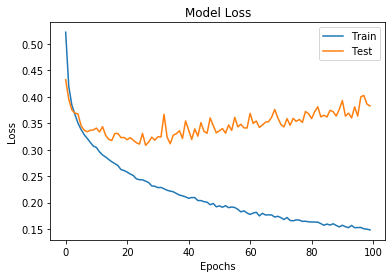

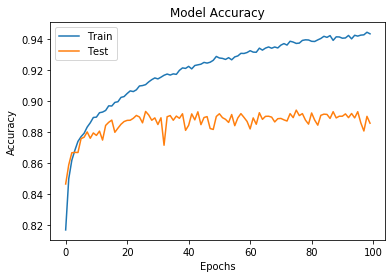

              precision    recall  f1-score   support

 T-shirt/Top       0.87      0.79      0.83      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.83      0.74      0.78      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.78      0.86      0.81      1000
      Sandal       0.98      0.95      0.96      1000
       Shirt       0.68      0.72      0.70      1000
     Sneaker       0.95      0.94      0.94      1000
         Bag       0.97      0.96      0.96      1000
  Ankle Boot       0.94      0.97      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



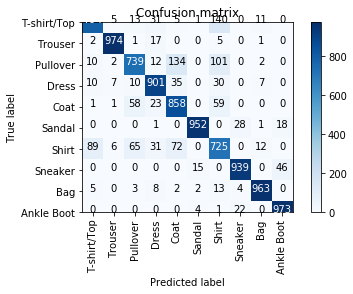

In [11]:
model = Sequential()
model.add(Dense(100, input_dim=num_pixels, activation='relu'))
model.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()
finalHistory = model.fit(train_images_flat, train_labels, validation_data=(validation_images_flat,validation_labels), epochs=100, shuffle=True,batch_size=64, verbose=1)
scor = model.evaluate(test_images_flat, test_labels)
print(scor)
plt.plot(finalHistory.history['loss'])
plt.plot(finalHistory.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()
plt.plot(finalHistory.history['acc'])
plt.plot(finalHistory.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()
Y_pred = model.predict(test_images_flat)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(test_labels,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])
#coat, pullover, shirt and top are visually similar
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(classification_report(Y_true, Y_pred_classes, target_names = classes))
#adam leads to faster converge and slitly better performance, but the loss will go up if over trained

# 8 Normalization

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 3s 60us/step - loss: 10.4307 - acc: 0.3488 - val_loss: 9.4584 - val_acc: 0.4105
Epoch 2/100
48000/48000 [==============================] - 2s 42us/step - loss: 9.5984 - acc: 0.4017 - val_loss: 9.2605

Epoch 52/100
48000/48000 [==============================] - 2s 43us/step - loss: 9.0601 - acc: 0.4373 - val_loss: 8.9276 - val_acc: 0.4457
Epoch 53/100
48000/48000 [==============================] - 2s 44us/step - loss: 9.0348 - acc: 0.4391 - val_loss: 8.8734 - val_acc: 0.4490
Epoch 54/100
48000/48000 [==============================] - 2s 43us/step - loss: 9.1119 - acc: 0.4340 - val_loss: 8.8726 - val_acc: 0.4494
Epoch 55/100
48000/48000 [==============================] - 2s 43us/step - loss: 9.0266 - acc: 0.4396 - val_loss: 8.9611 - val_acc: 0.4437
Epoch 56/100
48000/48000 [==============================] - 2s 42us/step - loss: 9.0006 - acc: 0.4412 - val_loss: 8.8741 - val_acc: 0.4489
Epoch 57/100
48000/48000 [==============================] - 2s 42us/step - loss: 9.1043 - acc: 0.4347 - val_loss: 8.8939 - val_acc: 0.4479
Epoch 58/100
48000/48000 [==============================] - 2s 43us/step - loss: 9.0848 - acc: 0.4358 - val_loss: 8.8479 - val_acc: 0.4506
Epoch 59/100
48000/48000 [=

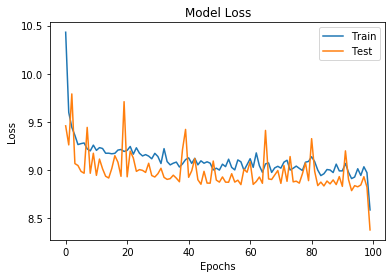

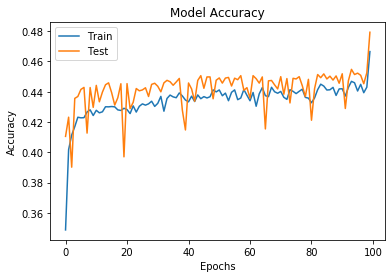

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

 T-shirt/Top       0.00      0.00      0.00      1000
     Trouser       0.00      0.00      0.00      1000
    Pullover       0.72      0.40      0.51      1000
       Dress       0.43      0.86      0.57      1000
        Coat       0.53      0.90      0.67      1000
      Sandal       0.33      1.00      0.50      1000
       Shirt       0.36      0.60      0.45      1000
     Sneaker       0.00      0.00      0.00      1000
         Bag       0.92      0.96      0.94      1000
  Ankle Boot       0.00      0.00      0.00      1000

    accuracy                           0.47     10000
   macro avg       0.33      0.47      0.36     10000
weighted avg       0.33      0.47      0.36     10000



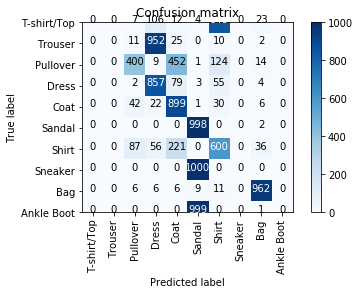

In [8]:
#reload data
(images, labels), (test_images, test_labels) = fashion_mnist.load_data()
num_pixels = images.shape[1] * images.shape[2]
#no normalization
#images = images/255
#test_images = test_images/255

images_flat = images.reshape(images.shape[0], num_pixels).astype('float32')
test_images_flat = test_images.reshape(test_images.shape[0], num_pixels).astype('float32')

labels = np_utils.to_categorical(labels)
test_labels = np_utils.to_categorical(test_labels)
num_classes = labels.shape[1]
model = Sequential()
model.add(Dense(100, input_dim=num_pixels, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()
finalHistory = model.fit(train_images_flat, train_labels, validation_data=(validation_images_flat,validation_labels), epochs=100, shuffle=True,batch_size=64, verbose=1)
scor = model.evaluate(test_images_flat, test_labels)
print(scor)
plt.plot(finalHistory.history['loss'])
plt.plot(finalHistory.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()
plt.plot(finalHistory.history['acc'])
plt.plot(finalHistory.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()
Y_pred = model.predict(test_images_flat)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(test_labels,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])
#coat, pullover, shirt and top are visually similar
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(classification_report(Y_true, Y_pred_classes, target_names = classes))
#adam leads to faster converge and slitly better performance, but the loss will go up if over trained